In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# to supres Pandas warnings
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

%matplotlib inline
plt.style.use("Solarize_Light2")

In [2]:
# current the current color palette
print(sns.color_palette().as_hex())
sns.color_palette()

['#268bd2', '#2aa198', '#859900', '#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4']


[(0.14901960784313725, 0.5450980392156862, 0.8235294117647058),
 (0.16470588235294117, 0.6313725490196078, 0.596078431372549),
 (0.5215686274509804, 0.6, 0.0),
 (0.7098039215686275, 0.5372549019607843, 0.0),
 (0.796078431372549, 0.29411764705882354, 0.08627450980392157),
 (0.8627450980392157, 0.19607843137254902, 0.1843137254901961),
 (0.8274509803921568, 0.21176470588235294, 0.5098039215686274),
 (0.4235294117647059, 0.44313725490196076, 0.7686274509803922)]

In [3]:
# opening data stored in Github
url = 'https://raw.githubusercontent.com/gornyMooj/pracuj_pl_scraping/New-Features/export.csv'
dataset = pd.read_csv(url)
dataset.head(4)

,work_id,added_at,offer_url,position_name,company_name,company_location,type_of_contract,work_schedule,work_modes,employment_level,immediate_employment,ukrainian_without_polish_language,vacancies
0,12857,2022-12-02 13:46:35.668238+01,https://www.pracuj.pl/praca/devops-engineer-wa...,DevOps Engineer,Ziflow Limited,Warszawa,Kontrakt B2B,Pełny etat,praca zdalna,Specjalista (Mid / Regular),NaN,NaN,NaN
1,13683,2022-12-02 13:47:02.919357+01,https://www.pracuj.pl/praca/it-support-manager...,IT Support Manager,Michael Page,Warszawa,Umowa o pracę,Pełny etat,NaN,Menedżer,NaN,NaN,NaN
2,13749,2022-12-02 13:47:05.52579+01,https://www.pracuj.pl/praca/supply-chain-manag...,Supply Chain Manager,HR Consulting,mazowieckie,Umowa o pracę,Pełny etat,praca stacjonarna,Menedżer,NaN,NaN,NaN
3,13750,2022-12-02 13:47:05.52776+01,https://www.pracuj.pl/praca/senior-accountant-...,Senior Accountant,Devire,Warszawa,Umowa o pracę,Pełny etat,praca hybrydowa,Starszy specjalista (Senior),NaN,NaN,NaN


#### Quick data exploration

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11386 entries, 0 to 11385
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   work_id                            11386 non-null  int64 
 1   added_at                           11386 non-null  object
 2   offer_url                          11386 non-null  object
 3   position_name                      11386 non-null  object
 4   company_name                       11386 non-null  object
 5   company_location                   11386 non-null  object
 6   type_of_contract                   11386 non-null  object
 7   work_schedule                      11303 non-null  object
 8   work_modes                         10510 non-null  object
 9   employment_level                   11386 non-null  object
 10  immediate_employment               4281 non-null   object
 11  ukrainian_without_polish_language  341 non-null    object
 12  vaca

#### Checking null values in the data

,Column Name,Null values
0,work_id,0
1,added_at,0
2,offer_url,0
3,position_name,0
4,company_name,0
5,company_location,0
6,type_of_contract,0
7,work_schedule,83
8,work_modes,876
9,employment_level,0


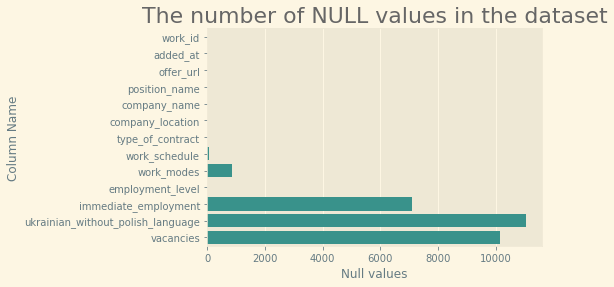

In [5]:
columns = list(dataset.columns)
no_of_nulls = [ dataset[x].isna().sum() for x in columns]

data = {
    'Column Name': columns,
    'Null values': no_of_nulls
}
df = pd.DataFrame(data)
display(df)

sns.barplot(data=df, y='Column Name', x='Null values', color='#2aa198')
# plt.xticks(rotation=90)
plt.title("The number of NULL values in the dataset", fontsize=22, color="#666666")
plt.savefig('The number of NULL values in data.png', bbox_inches='tight')

plt.show()

#### Type of contracts

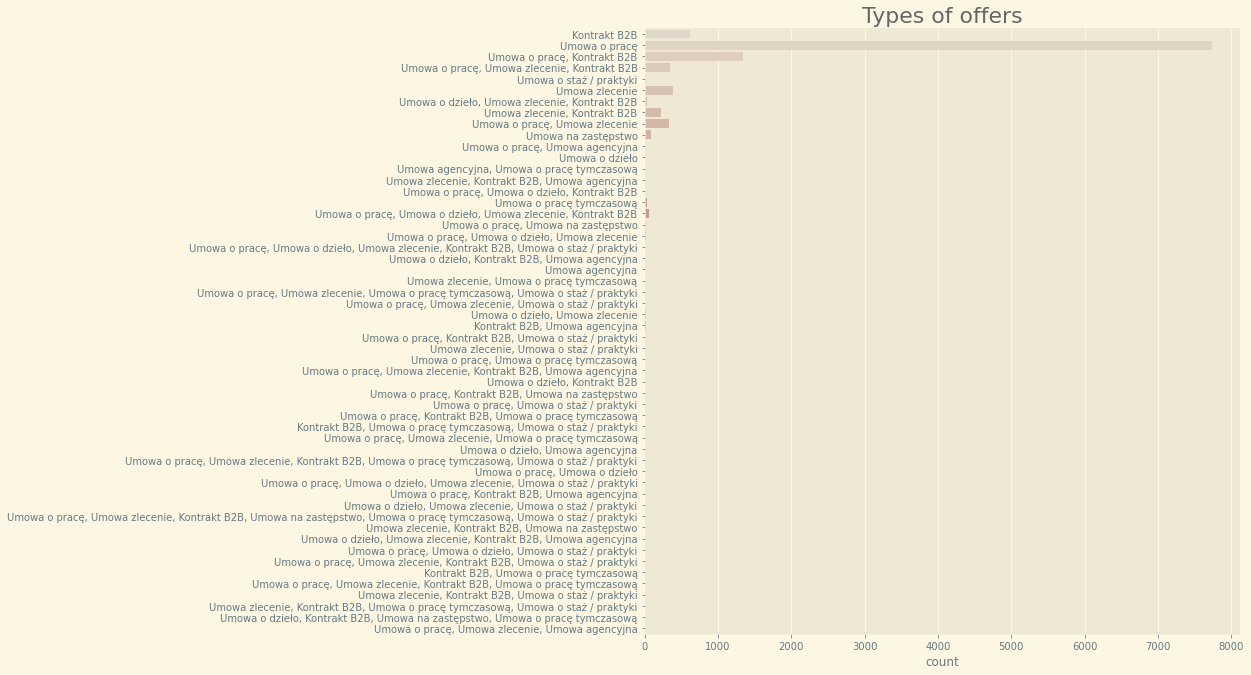

In [6]:
sns.catplot(data=dataset, y="type_of_contract", kind="count", palette="ch:.25", height=9)

plt.title("Types of offers", fontsize=22, color="#666666")
plt.savefig('Types of offers.png', bbox_inches='tight')

plt.ylabel('')

plt.show()

#### Work schedule	

In [7]:
dataset['work_schedule'].unique()

array(['Pełny etat', nan, 'Część etatu', 'Część etatu, Pełny etat',
       'Dodatkowa / tymczasowa', 'Część etatu, Dodatkowa / tymczasowa',
       'Część etatu, Dodatkowa / tymczasowa, Pełny etat',
       'Dodatkowa / tymczasowa, Pełny etat'], dtype=object)

In [8]:
dataset['work_schedule'] = dataset['work_schedule'].fillna('Not specified')

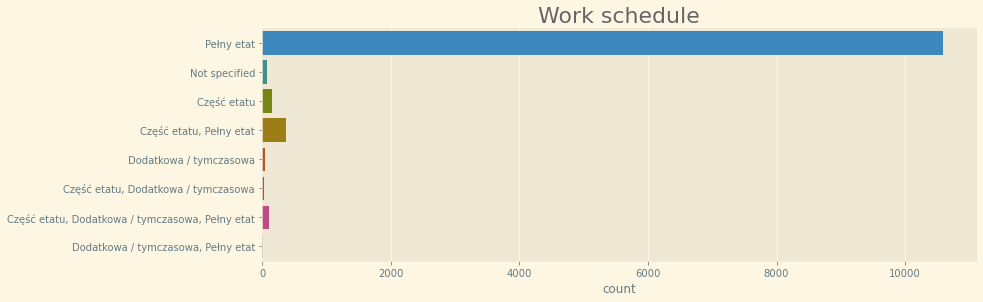

In [9]:
sns.catplot(data=dataset, y="work_schedule", kind="count", height=4, aspect=3.5)

plt.title("Work schedule", fontsize=22, color="#666666")
plt.savefig('Work schedule.png', bbox_inches='tight')

plt.ylabel('')

plt.show()

#### Work type

In [10]:
dataset['work_modes'].unique()

array(['praca zdalna', nan, 'praca stacjonarna', 'praca hybrydowa',
       'praca mobilna', 'praca stacjonarna, praca hybrydowa',
       'praca hybrydowa, praca zdalna', 'praca stacjonarna, praca zdalna',
       'praca stacjonarna, praca hybrydowa, praca zdalna'], dtype=object)

In [11]:
dataset['work_modes'] = dataset['work_modes'].fillna('Not specified')

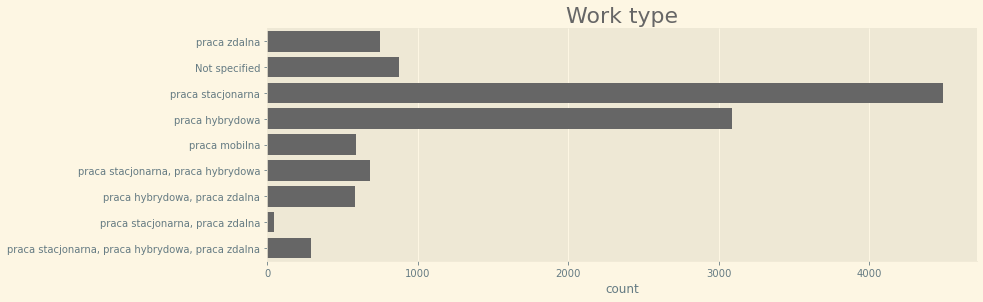

In [12]:
sns.catplot(data=dataset, y="work_modes", kind="count", height=4, aspect=3.5, color="#666666")

plt.title("Work type", fontsize=22, color="#666666")
plt.savefig('Work type.png', bbox_inches='tight')

plt.ylabel('')

plt.show()

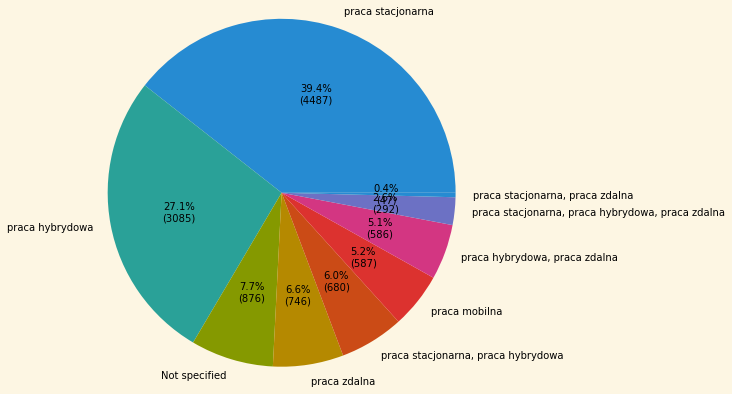

In [13]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = dataset['work_modes'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s), radius=2)
plt.savefig('Work type V2.png', bbox_inches='tight')

plt.show()

#### Employment level

In [14]:
dataset['employment_level'].unique()

array(['Specjalista (Mid / Regular)', 'Menedżer',
       'Starszy specjalista (Senior)', 'Pracownik fizyczny',
       'Starszy specjalista (Senior), Ekspert',
       'Młodszy specjalista (Junior)',
       'Młodszy specjalista (Junior), Specjalista (Mid / Regular)',
       'Asystent, Młodszy specjalista (Junior)', 'Asystent',
       'Kierownik / Koordynator',
       'Specjalista (Mid / Regular), Starszy specjalista (Senior)',
       'Praktykant / Stażysta', 'Ekspert',
       'Kierownik / Koordynator, Menedżer', 'Dyrektor',
       'Menedżer, Dyrektor', 'Praktykant / Stażysta, Asystent',
       'Dyrektor, Prezes', 'Prezes'], dtype=object)

In [15]:
dataset['employment_level'] = dataset['employment_level'].fillna('Not specified')

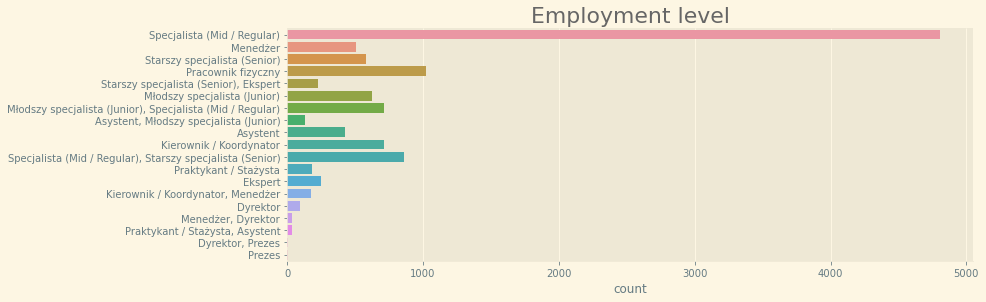

In [16]:
sns.catplot(data=dataset, y="employment_level", kind="count", height=4, aspect=3.5)

plt.title("Employment level", fontsize=22, color="#666666")
plt.savefig('Employment level.png', bbox_inches='tight')

plt.ylabel('')

plt.show()